# Lab One: Visualization and Data Preprocessing
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding

***!! TO be updated***
+ What factors influence a person's income? Our first project for the Machine Learning course in the DataScience@SMU program was to perform an Explanatory Data Analysis with a data set of our choosing, which we chose an Adult Census Income data set. This data set was extracted from the U.S Census Bureau by Bary Becker in 1994 and is widely used on the Kaggle website. We used this data to better understand the factors that influence a person having an income of either more or less than $50,000 annually.

+ Some of the specific relations that we looked at are the statistical significances between sex versus income, and race versus income. We performed a *chi-squared test* and used it's p-value to assess and confirm the mentioned above. Another aspect that we looked at, is despite how a person can't change their gender, race and age, we should be able to see what specific education level and other achievable factors, with their specific race, age or sex, could help a person to get an income of more than $50k annually. A *two-way ANOVA* was conducted to validate that and check for statistical significance. A *PCA* was also conducted to reduce dimensions and visualize the data.

+ Given the results of these hypotheses, they can help us find the societal gaps the government should address while also giving us an idea of the important factors that can influence a person's income.

In [267]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express


In [268]:
# Import file
df=pd.read_csv("adult.csv")

# Data Understanding

## Data types
### Meaning and Type of Data
+ The original data consists of 32,561 entries/rows and 14 attributes/columns, with the response variable being "income".


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos, Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discret, Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous, Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete, Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete, Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete, Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete, Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete, Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete, Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete, Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous, Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous, Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous, Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete, Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete, Ordinal* | `<=50k, >50k` 


In [269]:
df.shape

(32561, 15)

In [270]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Quality

### Missing Values
+ We do see missing values in workclass, occupation and native.country entered as "?". 

+ Despite the "?" values taking around 5% of their respective columns "workclass", "occupation", "native.country", they were not removed due to the following reason. Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

	|Column	|MissingValues|
   | --- | --- | 
	|workclass	|1836|
	|occupation	|1843|
	|native.country|	583|
    


In [272]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [273]:
# Verify missing values for categorical variables 
# FOR-LOOP
# Other than the question marks (?), this for-loop counts incorrect values based on the 
# assumption that they have less than 2 characters
# Returns a list of characters that are found
# Otherwise, return []

counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{"['?']", '[]'}


,Column,MissingValues
0,workclass,1836
3,occupation,1843
7,native.country,583


In [274]:
# Replacing question marks (?) with "Unknown"
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


In [275]:
# Verifying that there are no "?"
counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]

{'[]'}


,Column,MissingValues


### Duplicates
+ We do find that there are 24 duplicate records but we will keep those entries because it makes sense that there could be a small number of people with same entries considering the categories we are given and the fact that this is census data with over 30,000 entries. 


In [276]:
#duplicates
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

### Outliers

+ Checking Capital gain and loss, we can see median is 0 and mean is 1077 showing just outliers. We will discuss this and how we dealt with it later on.

+ All of the values that would be considered outliers in each category are plausible and do not look like misreported data. Therefore, we will not remove any data. 

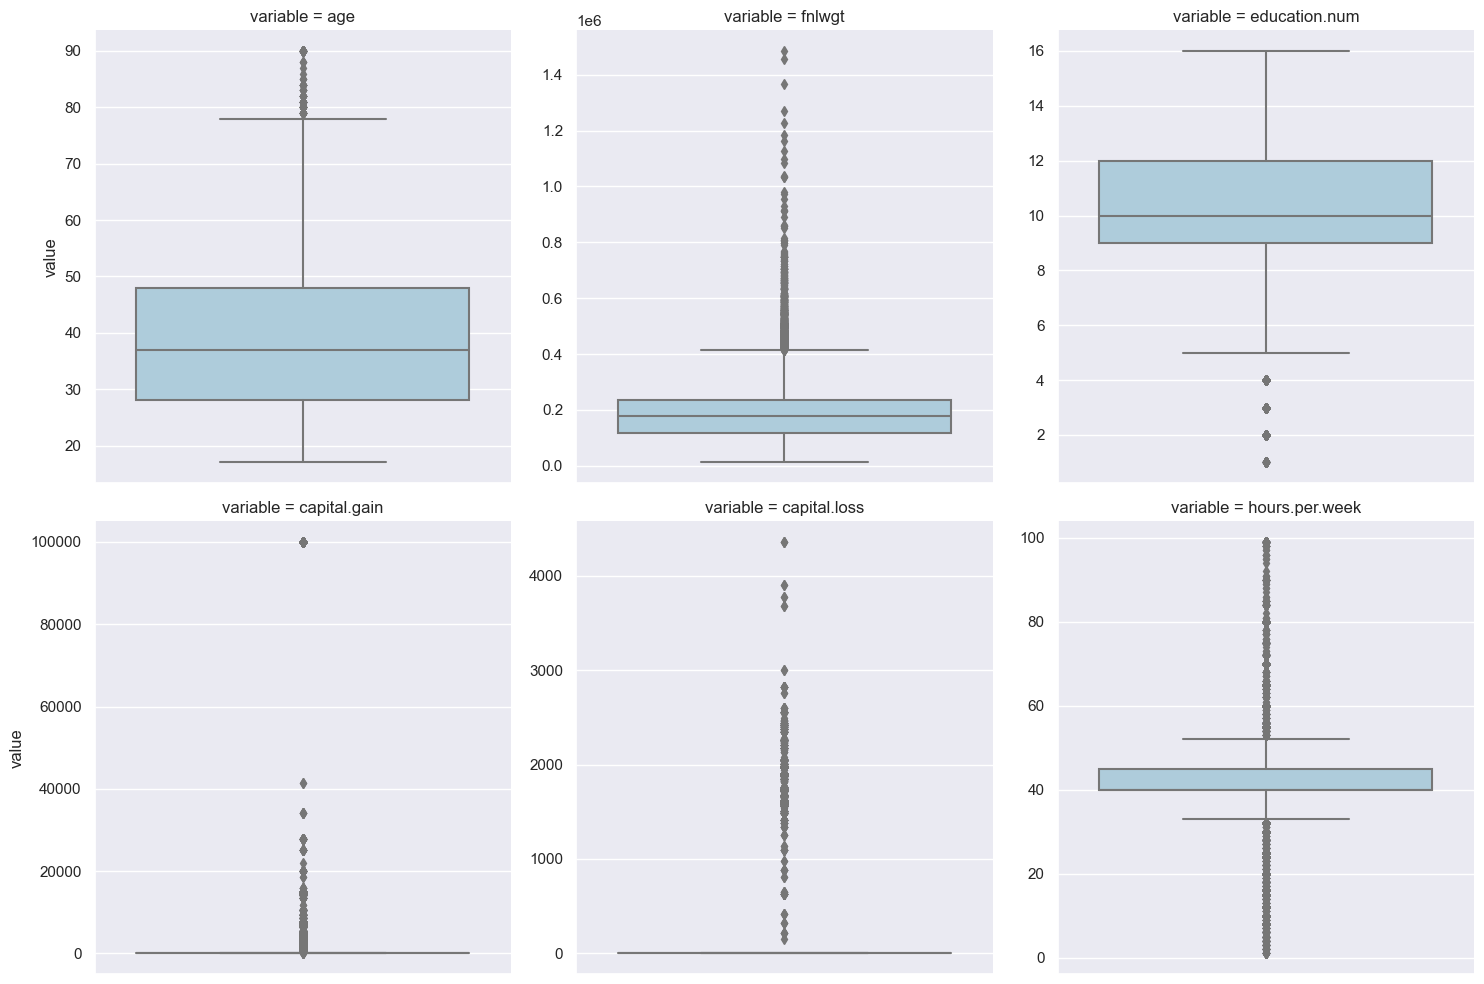

In [277]:
numdf = df._get_numeric_data()

sns.catplot(y='value', col='variable', sharey=False, col_wrap=3, 
            data=numdf.melt(), kind='box')
plt.show()

 ##  New Variables / Features

Based on the factors we have, we saw that we could segmnent age and hours worked into categories that we can use to visualize and further analyze. We also see that capital gain and capital loss have the same distribution and can be combined into a single variable as net_capital.

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)



In [278]:
# New variables, these will also help us with graphs 
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])

In [279]:
# making sure the new attributes are objects to match the rest 
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

## Statistics

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

The summary statistics for continuous variables are described below: 
+ This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable is.
+ We can see that age has a more normal distribution, with a mean of 38 years.
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it also has normal distribution with a mean of 10 and median of 10.
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis


In [280]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


+ Checking variance

In [281]:
df.var(numeric_only=True)

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64

# Distribution of continuous data 
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ Net capital is very right skewed, mostly points around 0 

age


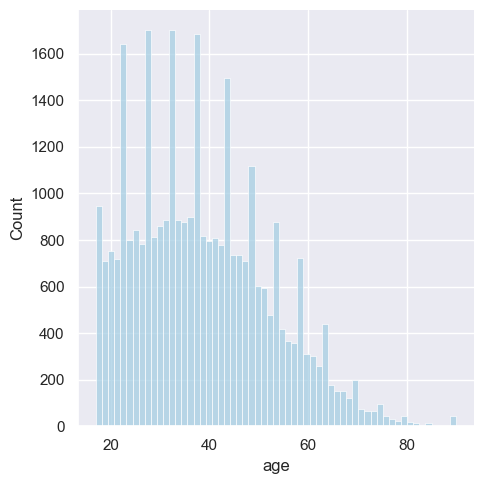

fnlwgt


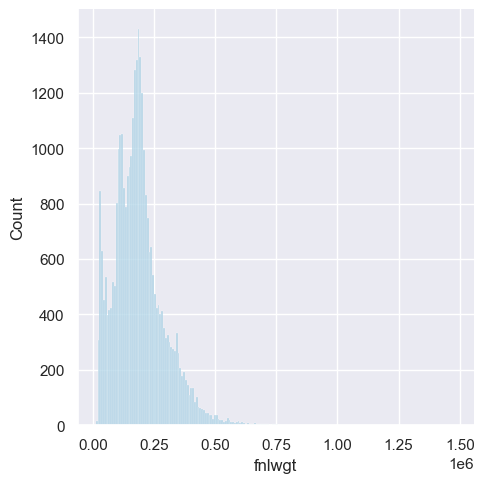

education.num


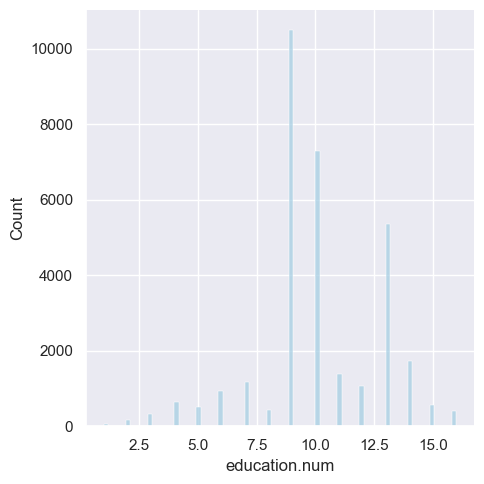

capital.gain


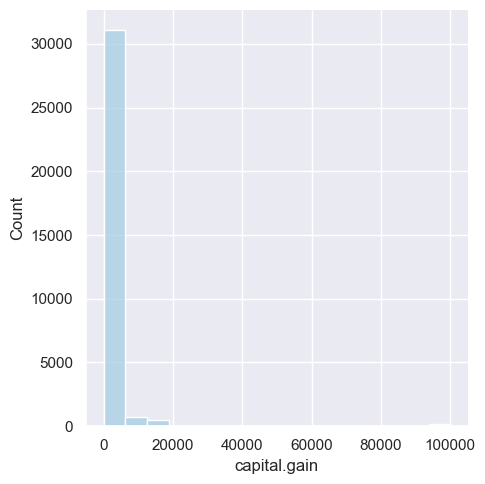

capital.loss


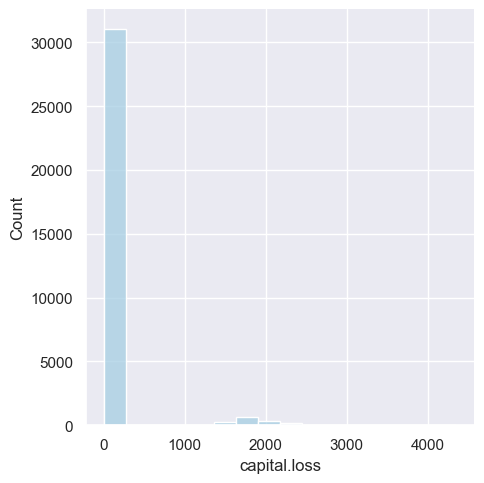

hours.per.week


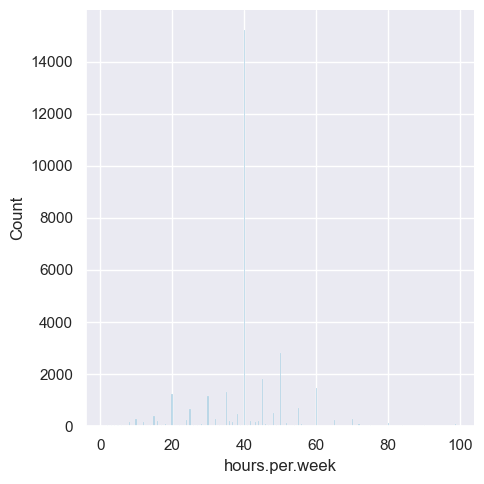

In [282]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    print('\033[1m' + i) 
    sns.displot(df[i], kde=False)
    plt.show()

# Distribution of categorical data


The distribution of each of the factors seems to make sense. Below are some of the things we noticed:
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Majority are white 
+ There are 6 times more husbands than wife and husbands is the largest group 
+ Above can be explained by total females being half of the total males 
+ Majority of the people are from US 
+ Most people make less than 50K. 76% of the individuals make less than 50K and only 24% make more than 50K 
+ Most people are middle aged
+ Most are full time 
+ More than half have at least graduated highschoool or higher education

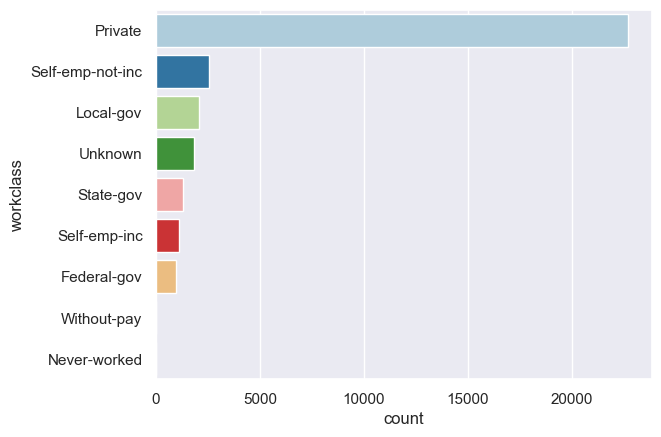

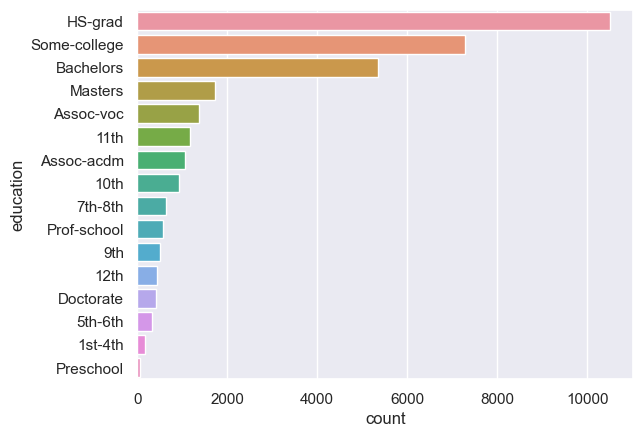

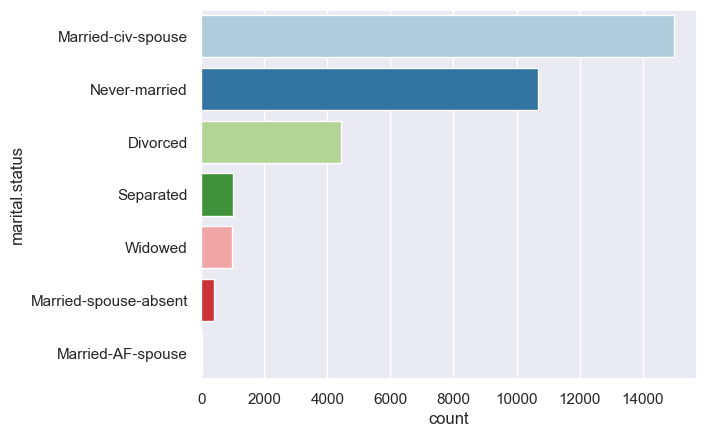

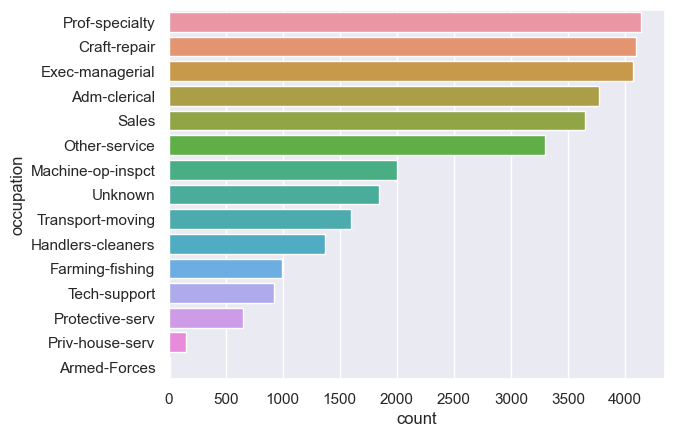

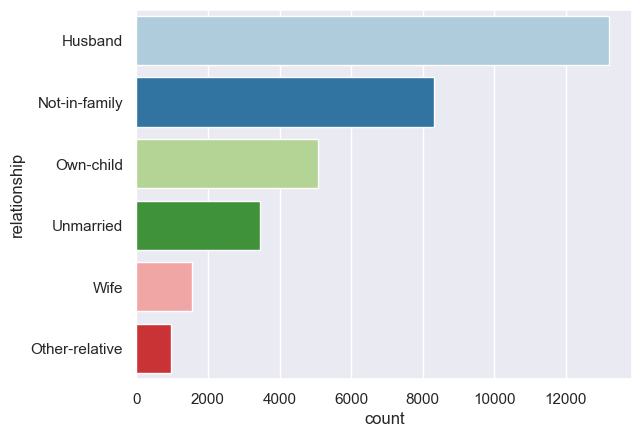

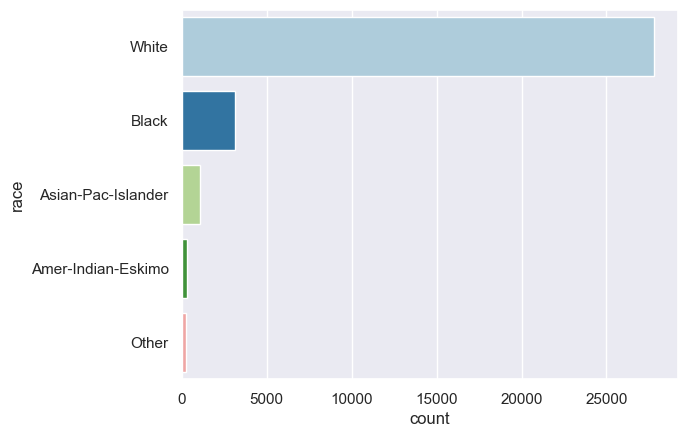

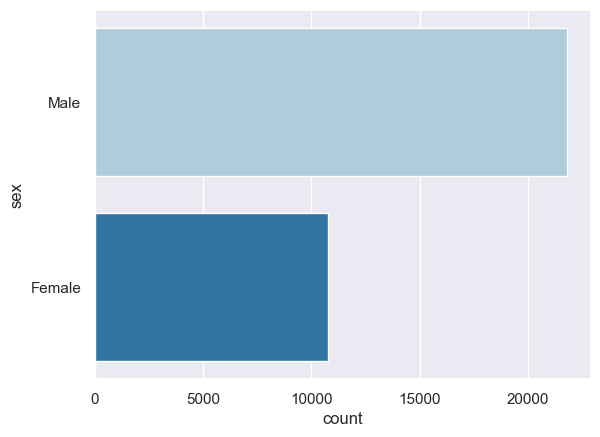

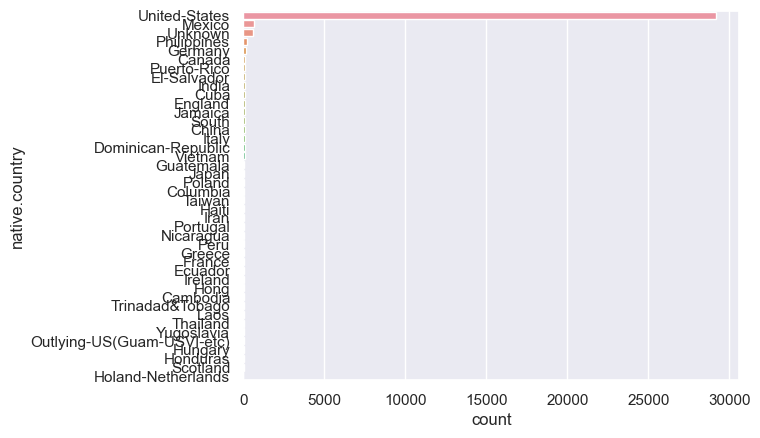

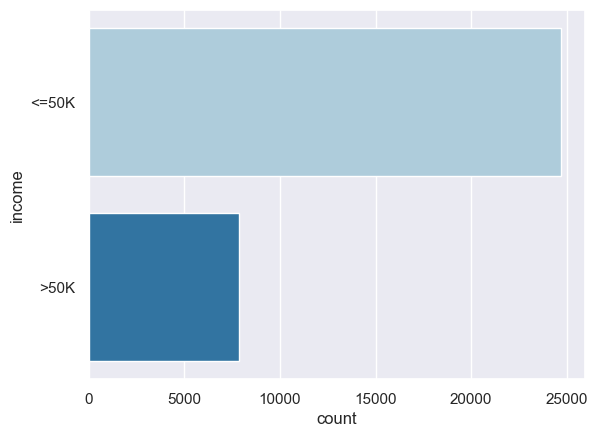

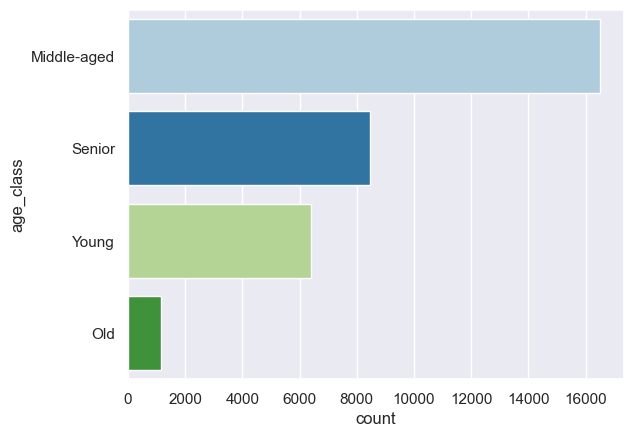

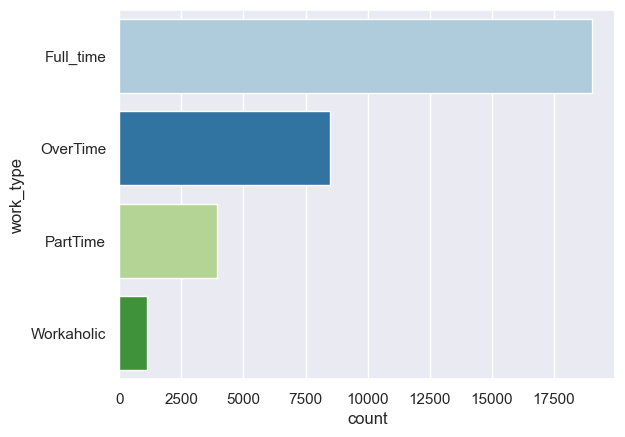

<Figure size 640x480 with 0 Axes>

In [283]:
sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


### After looking closer at the categorical distribution

+ 69.7% work in private companies.
+ 32.25% are highschool grads, 22.39% have some college education, and 16.44% have a Bachelor's degree. Only 5.29% have a Master's degree.
+ 46% of people entered in the data are married to a civillian, and 32.8% have never married.
+ The 3 occupation categories of professional specialty, craft repair, and executive managerial each represent 12% of all occupations.
+ 40.52% of people entered in the data are husbands, while only 4% are wives. This tells us that the husband is usually the one opening the door when US Census knocks on their door.
+ 85.43% of people are white.
+ 66.92% of people are males. This was contradicting the husbands versus wives distribution, so we digged deeper.
+ It seems like there are mistakes entered into the data but they are very minimal.
+ Almost 90% of people are native to the U.S., while 10% are from another country.
+ About a quarter of our population makes over $50,000.

# Exploring Relationships 

### We can see that people that did not graduate from highschool have lower chances for making greater than 50K regardless of sex

[Text(0.5, 1.0, 'Female')]

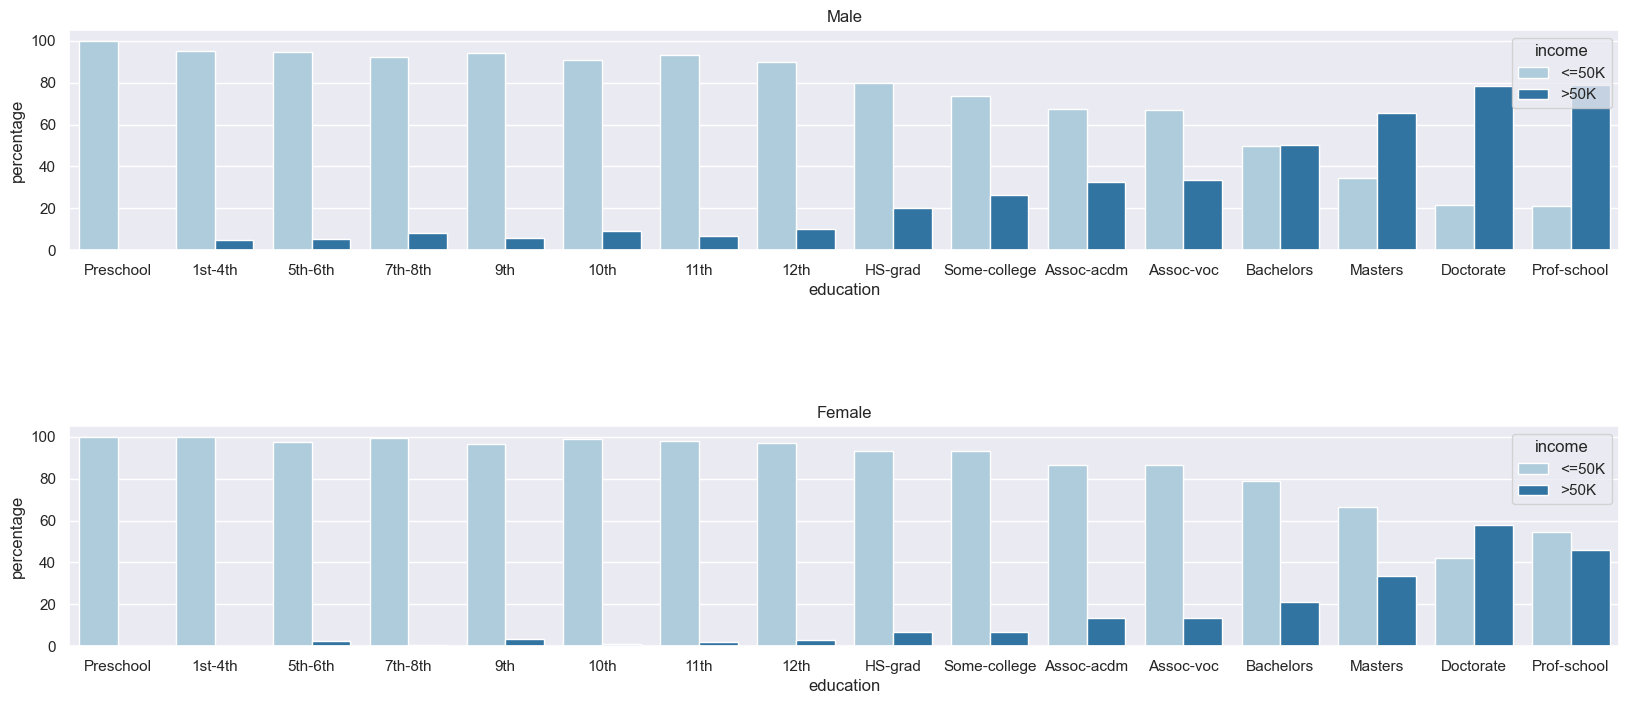

In [284]:
sns.set()
fig, axes = plt.subplots(2, 1,figsize=(20, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.125)

sns.set_palette("Paired")
x, y, hue = "education", "percentage", "income"


educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

n=df[df["sex"]=="Male"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order,ax=axes[0])).set(title='Male')


n=df[df["sex"]=="Female"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order ,ax=axes[1])).set(title='Female')


### We can see that the majority of people from 30 to 55 are more likely to have  greater than 50K

Text(0.5, 1.0, 'Percentage income per age')

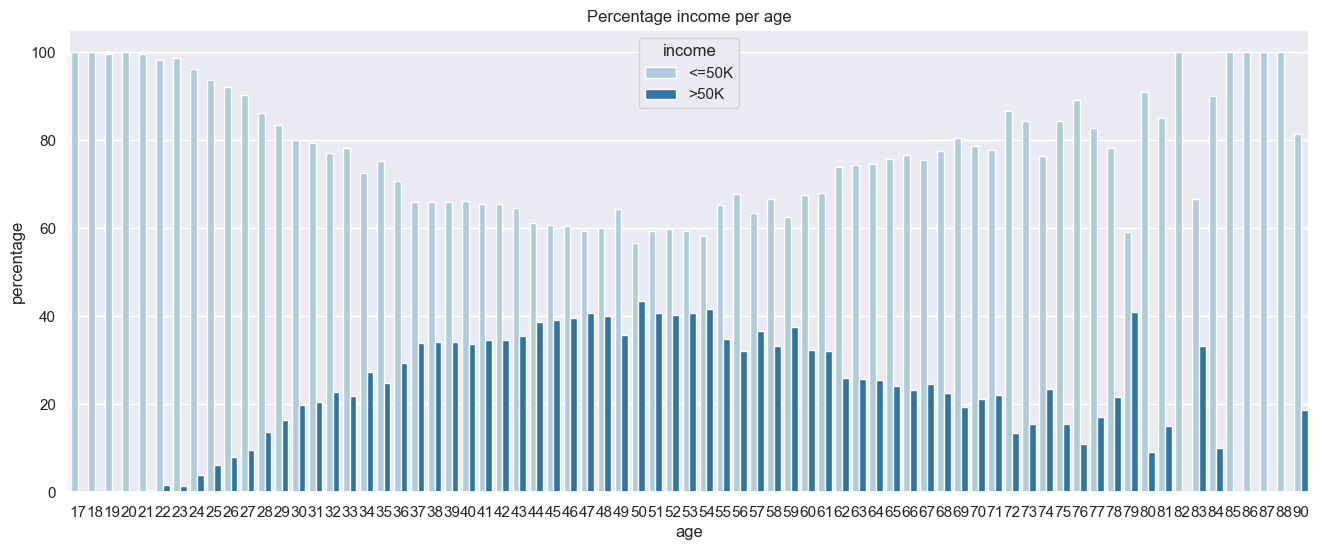

In [285]:
plt.figure(figsize=(16,6))
x, y, hue = "age", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1).rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title("Percentage income per age")

### Correlation Plot
+ We do not see high correlation between any of our continuous variables. 
+ We see the highest correlation between education.num and hours per week with a value of 0.15. 

<AxesSubplot:>

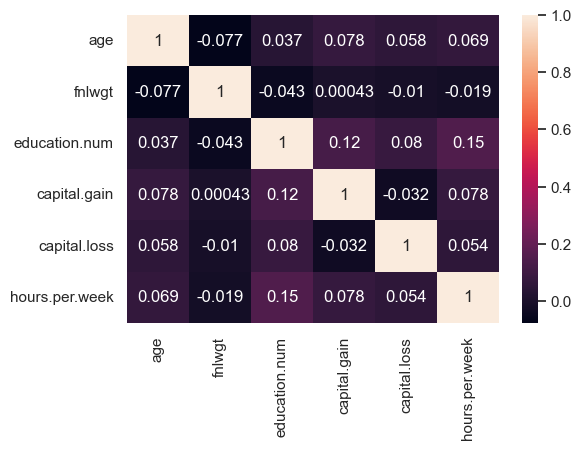

In [286]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)

# MODEL

In [287]:
#After seeing the relationships we want to turn Native.country as Interger
# 1 representing US and 0 representing all non US countries
df['IsImmigrant'] = np.where(df['native.country']!= 'United-States', 1, 0)

#Converting the income and Male into intergers 
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) 
df["isMale"]=[1 if (x=="Male") else 0 for x in df["sex"]]

#Deleting the variable created to view relationships and those that have been turned into new Intergers representations
df=df.drop(columns=["sex","education","work_type","age_class","native.country"])


In [288]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale
0,90,Unknown,77053,9,Widowed,Unknown,Not-in-family,White,0,4356,40,0,0,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,0,0,0
2,66,Unknown,186061,10,Widowed,Unknown,Unmarried,Black,0,4356,40,0,0,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,0,0,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,3900,40,0,0,0


In [290]:
modelDf=df.copy()
df_continuous = modelDf.select_dtypes(exclude=['object'])
# Standarizing variables excluding the categories(dummies)
for i in (df_continuous.columns):
    if (i !="income" and i!="IsImmigrant" and i !="isMale"):
        modelDf[i] = StandardScaler().fit_transform(modelDf[[i]])
modelDf=pd.get_dummies(modelDf, columns=modelDf.select_dtypes(include=['object']).columns)
modelDf.head()

In [292]:
x=modelDf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 1], dtype=int32)

In [293]:
df["labels"]=kmeans.labels_

In [300]:
df[df["labels"]==0].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,labels
count,17119.000000,1.711900e+04,17119.000000,17119.000000,17119.000000,17119.000000,17119.000000,17119.000000,17119.000000,17119.0
mean,46.558619,1.756550e+05,10.479175,1915.793913,0.697880,43.690811,0.390677,0.092821,0.793796,0.0
std,11.737577,9.431440e+04,2.649374,10050.859787,21.100009,12.379978,0.487916,0.290190,0.404590,0.0
min,19.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,38.000000,1.109425e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.0
50%,46.000000,1.691330e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.0
75%,54.000000,2.195910e+05,13.000000,0.000000,0.000000,50.000000,1.000000,0.000000,1.000000,0.0
max,90.000000,1.097453e+06,16.000000,99999.000000,880.000000,99.000000,1.000000,1.000000,1.000000,0.0


In [301]:
df[df["labels"]==1].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,labels
count,13958.000000,1.395800e+04,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.0
mean,28.473635,2.075498e+05,9.495415,164.267660,0.617495,36.136911,0.027368,0.119286,0.505731,1.0
std,8.177124,1.162166e+05,2.332091,1234.039878,21.219540,10.924216,0.163159,0.324137,0.499985,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,22.000000,1.306200e+05,9.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.0
50%,27.000000,1.910880e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,1.0
75%,34.000000,2.612450e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,1.0
max,72.000000,1.484705e+06,16.000000,41310.000000,974.000000,99.000000,1.000000,1.000000,1.000000,1.0


In [302]:
df[df["labels"]==2].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,labels
count,1484.000000,1484.000000,1484.000000,1484.0,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.0
mean,41.634097,185549.750674,10.988544,0.0,1901.707547,43.357143,0.519542,0.092318,0.769542,2.0
std,12.649652,97574.222813,2.689457,0.0,322.643948,12.259685,0.499786,0.289572,0.421268,0.0
min,17.000000,20953.000000,1.000000,0.0,974.000000,1.000000,0.000000,0.000000,0.000000,2.0
25%,32.000000,118878.000000,9.000000,0.0,1719.000000,40.000000,0.000000,0.000000,1.000000,2.0
50%,41.000000,175300.500000,10.000000,0.0,1887.000000,40.000000,1.000000,0.000000,1.000000,2.0
75%,50.000000,228875.250000,13.000000,0.0,1977.000000,50.000000,1.000000,0.000000,1.000000,2.0
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000,1.000000,1.000000,1.000000,2.0


In [345]:
#Peforming DBSCAN

n_clusters = 2
model = DBSCAN(eps=0.15, min_samples=10).fit(x)
labels = model.labels_


In [350]:
predict(x, y=None)

NameError: name 'predict' is not defined

In [347]:
#Performing KNN ++
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(x)
labels = model.labels_


In [348]:
# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='ward',
                                affinity="l1"
                                n_clusters=n_clusters)
model.fit(x)

In [ ]:
# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='ward',
                                n_clusters=n_clusters)
model.fit(x)

In [ ]:
# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='single',
                                n_clusters=n_clusters)
model.fit(x)

In [ ]:
# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='complete',
                                n_clusters=n_clusters)
model.fit(x)

In [ ]:
# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='average',
                                n_clusters=n_clusters)
model.fit(x)

Option A: Cluster Analysis 
• Perform cluster analysis using several clustering methods 
• How did you determine a suitable number of clusters for each method? 
• Use internal and/or external validation measures to describe and compare the 
clusterings and the clusters (some visual methods would be good). 
• Describe your results. What findings are the most interesting and why? 

Deployment (10 points total) 
• Be critical of your performance and tell the reader how you current model might be usable by 
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? 
• How useful is your model for interested parties (i.e., the companies or organizations 
that might want to use it)? 
• How would your deploy your model for interested parties?  
• What other data should be collected?  
• How often would the model need to be updated, etc.? 

In [ ]:
# an example using SpectralClustering, which assumes that the graphical data needs to be calculated from the structure
from sklearn.cluster import SpectralClustering

X = 
nclust = 5

# If a string, this may be one of 
#  ‘nearest_neighbors’, ‘precomputed’, ‘rbf’ 
#  or one of the kernels supported by sklearn.metrics.pairwise_kernels
spc = SpectralClustering(n_clusters=nclust, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

# Extra statistical tests on above some of the above assumptions

In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Age and Income Anova

+ We performed an Anova between Income and age to check if there was a statistical significance.
+ We found that there was enough evidence to suggest that mean age of people making  more than 50K is not equal to mean age of people making less than 50K (p-value < 0.001). 


In [167]:
# Checking columns names
df.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'income', 'age_class', 'work_type',
       'net_capital'],
      dtype='object')

In [168]:
# Updating column names 
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'income', 'age_class', 'work_type',
       'net_capital']


In [169]:
# Logging age due to the skewness
from sklearn.preprocessing import FunctionTransformer 
log_transformer = FunctionTransformer(np.log1p)
df["age"] = log_transformer.fit_transform(df[["age"]])

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('age ~ C(income)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

In [ ]:
# Tukey
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df, res_var='age', xfac_var='income', anova_model='age ~ C(sex)')
res.tukey_summary

#### Checking assumptions for the Anova test
+ There is not enough evidence to suggest the residuals are not normally distributed based on the residuals plot and the qq plot. 

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Chi-squared test to check if there is a statistical difference between income and sex 
+ There is enough evidence to reject the null hypothesis of males and females having equal income (p_val=0.0000)
+ Based on evidence seen on the EDA we see this discrepancy where males have a higher income.

In [ ]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(df.sex, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

#p val o 0.0, Statistical val 1441.4918478416585, df=2

# Chi-squared test to check if there is a statistical difference between income and race 
+ There is strong evidence to reject the null hypothesis that all races have an equal income (p_val=2.266882172058718e-07)

In [ ]:
import scipy

In [ ]:
chisqt = pd.crosstab(df.race, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])
